To create a CNN model which should be trained on 2 classes i.e cats and dogs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 ## Importing all the libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [3]:
# execute this only once... if you run again, skip this part
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Artificial_Intelligence_Engineering/CV/5_train.zip", 'r') as zip_ref:        # get the path for train.zip using copypath. paste the link within the quotation
     # creates new folder 'cats_dogs_images' and saves all images present in train.zip
    zip_ref.extractall("/content/extracted_images")  # create a new folder, rename it and get the path of it using copypath.. paste the link here



In [4]:
files_list = os.listdir("/content/extracted_images/train")

# Count the number of files
num_files = len(files_list)
print(num_files)

25000


In [5]:
files_list[3]

'cat.286.jpg'

In [9]:
import matplotlib.image as mpimg
import cv2

myimg = mpimg.imread("/content/extracted_images/train/cat.1000.jpg")

myimg2 = cv2.imread("/content/extracted_images/train/cat.1000.jpg")

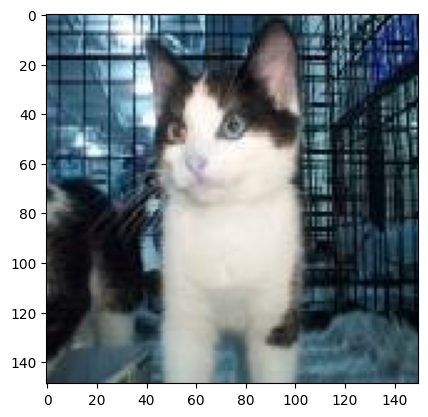

In [13]:
plt.imshow(myimg2)

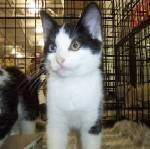

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(myimg2)

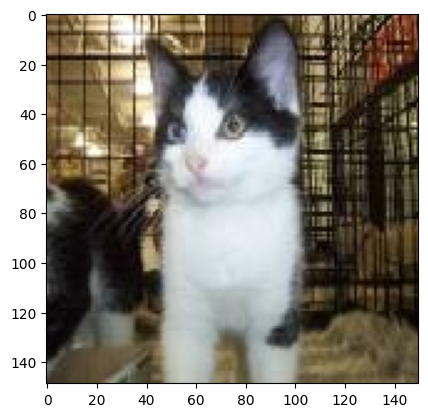

In [10]:
plt.imshow(myimg)

In [8]:
myimg.shape

(149, 150, 3)

In [14]:
import os, shutil, pathlib

original_dir = pathlib.Path(r"/content/extracted_images/train") # get the path of train folder in cats_dogs_images using copypath and paste the link here
new_base_dir = pathlib.Path(r"/content/my_images") # create a new folder, rename it and get the path using copypath and paste the link here.


# define a function to create subsets for train, test and validation
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# calling the function thrice to create 3 subsets.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

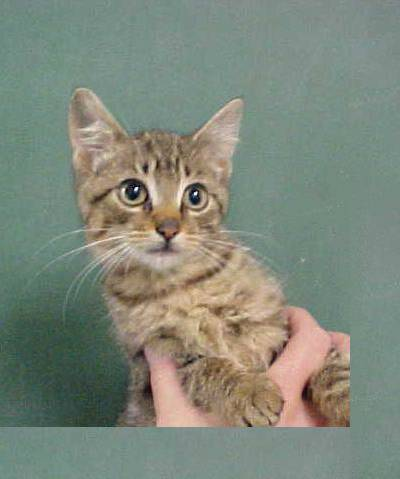

In [ ]:
from google.colab.patches import cv2_imshow
imgg = cv2.imread("/content/my_images/test/cat/cat.1502.jpg")
cv2_imshow(imgg)


In [ ]:
print(type(imgg))
print(imgg.shape)

<class 'numpy.ndarray'>
(479, 400, 3)


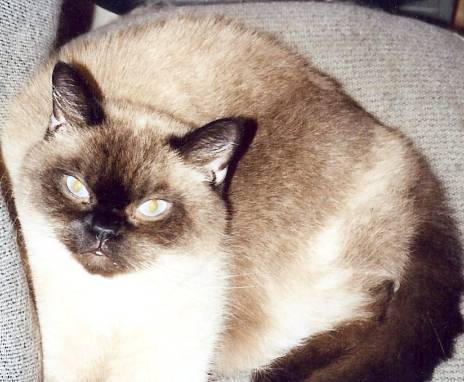

In [15]:
imgg = cv2.imread("/content/my_images/test/cat/cat.1516.jpg")
cv2_imshow(imgg)

In [16]:
print(type(imgg))
print(imgg.shape)

<class 'numpy.ndarray'>
(382, 464, 3)


In [17]:
## This step helps in converting all the images present in folder to same shape.
import cv2
import numpy as np
labels = ['cat', 'dog']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label) # path to cat folder inside train folder
        class_num = labels.index(label) # 0
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data,dtype=object)

In [18]:
train = get_data(r'/content/my_images/train')
val = get_data(r'/content/my_images/test')



<class 'numpy.ndarray'>
2000
(2000, 2)
<class 'numpy.ndarray'>
2
(2,)
<class 'numpy.ndarray'>
(224, 224, 3)
0


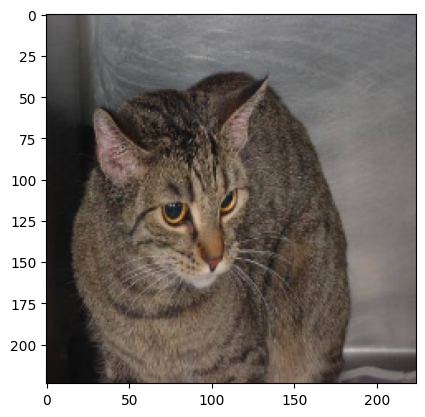

In [29]:
print(type(train))
print(len(train))
print(train.shape)
print(type(train[34]))
print(len(train[34]))
print(train[34].shape)
print(type(train[34][0]))
print(train[34][0].shape)
print(train[34][1])
plt.imshow(train[34][0])

In [ ]:
a = 1
b = 2
c = 3
# [[a,123],[b,213],[c,31]]
myarr = np.array([[a,123],[b,213],[c,31]])
print(myarr)
print(myarr.shape)

## The numpy array is able to convert nested list into 2d np array because the element of nested list is of same data type

In [ ]:
image1 = np.array([[2,3],[4,5]])
image2 = np.array([[5,3],[7,4]])
image3 = np.array([[3,4],[8,8]])

np.array([[image1,0],[image2,0],[image3,0]])
## The numpy array is unable to convert nested list into 2d np array because the element of nested list is of different data type

In [ ]:
## Setting up every element inside the numpy array as Object to convert nested list into 2d np array
np.array([[image1,0],[image2,0],[image3,0]],dtype=object)

array([[array([[2, 3],
               [4, 5]]), 0],
       [array([[5, 3],
               [7, 4]]), 0],
       [array([[3, 4],
               [8, 8]]), 0]], dtype=object)

In [30]:
print(len(train))
print(len(val))
print(train.shape)
print(val.shape)

2000
2000
(2000, 2)
(2000, 2)


In [31]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(np.array(feature))
  y_train.append(int(label))

for feature, label in val:
  x_val.append(np.array(feature))
  y_val.append(int(label))

# Normalize the data
x_train = np.array(x_train).astype('float32') / 255
x_val = np.array(x_val).astype('float32') / 255



In [32]:
## Generating data or images during runtime for training purpose.DO not do it for testing
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [33]:
x_train.shape

(2000, 224, 224, 3)

In [34]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [35]:
#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [36]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
#history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))


from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_val, y_val), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.69440, saving model to model.weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 190s - loss: 0.6954 - accuracy: 0.5045 - val_loss: 0.6944 - val_accuracy: 0.4900 - 190s/epoch - 3s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.69440 to 0.69275, saving model to model.weights.best.hdf5
63/63 - 186s - loss: 0.6918 - accuracy: 0.5085 - val_loss: 0.6928 - val_accuracy: 0.5325 - 186s/epoch - 3s/step
Epoch 3/100

Epoch 3: val_loss improved from 0.69275 to 0.69185, saving model to model.weights.best.hdf5
63/63 - 183s - loss: 0.6943 - accuracy: 0.5095 - val_loss: 0.6918 - val_accuracy: 0.5345 - 183s/epoch - 3s/step
Epoch 4/100

Epoch 4: val_loss improved from 0.69185 to 0.69124, saving model to model.weights.best.hdf5
63/63 - 187s - loss: 0.6945 - accuracy: 0.5090 - val_loss: 0.6912 - val_accuracy: 0.5320 - 187s/epoch - 3s/step
Epoch 5/100

Epoch 5: val_loss improved from 0.69124 to 0.69010, saving model to model.weights.best.hdf5
63/63 - 181s - loss: 0.6941 - accuracy: 0.5215 - val_loss: 0.6901 - val_accuracy: 0.5425 - 181s/epoch - 3s/step
Epoch 6/100

Epoch 6

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Task
fine tune the configuration
train the model on more than 100